# Extintion Times and Probabilities Graph

In [25]:
import sys
import os
sys.path.append("..")
sys.path.append(os.getcwd())
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()


In [26]:
extinction_times_100 = pd.read_excel("../Data/Extinction Times/100_infection_every_scenario.xlsx")

In [27]:
extinction_times_100

,Unnamed: 0,hazard_rate_scale,infection_reporting_prob,contact_tracing_success_prob,contact_trace_delay_par,global_contact_reduction,two_step_tracing,prob_has_trace_app,backwards_trace,end_reason,...,720,721,722,723,724,725,726,727,728,729
0,0,0.215233,0.1,0.861562,2.055341,0.800433,True,0.105967,True,extinct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.243986,0.5,0.836168,1.594520,0.874651,True,0.286030,True,extinct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0.215233,0.1,0.763502,1.907265,0.055886,True,0.420426,False,more_than_X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.229609,0.3,0.740365,1.645039,0.836741,False,0.288533,False,extinct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.236797,0.4,0.791403,2.196062,0.796482,False,0.259584,False,extinct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0.236797,0.4,0.878836,2.350174,0.041508,True,0.091494,False,more_than_X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,996,0.215233,0.1,0.828602,1.671512,0.496054,True,0.268509,True,more_than_X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,997,0.229609,0.3,0.755155,2.150201,0.277832,True,0.064780,False,more_than_X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,998,0.215233,0.1,0.771177,1.850809,0.590693,False,0.110700,False,more_than_X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
went_extinct_100 = extinction_times_100.loc[
    (extinction_times_100["end_reason"] == "extinct") &
    (extinction_times_100["extinction_time"] != 15)]

Text(0, 0.5, 'Extinction Time (days)')

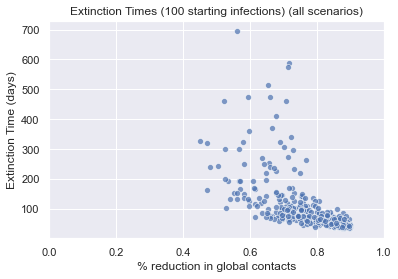

In [29]:
sns.scatterplot(x="global_contact_reduction",
                y="extinction_time",
                data = went_extinct_100,
                alpha = 0.7)
plt.xlim(0,1)
plt.title("Extinction Times (100 starting infections) (all scenarios)")
plt.xlabel("% reduction in global contacts")
plt.ylabel("Extinction Time (days)")

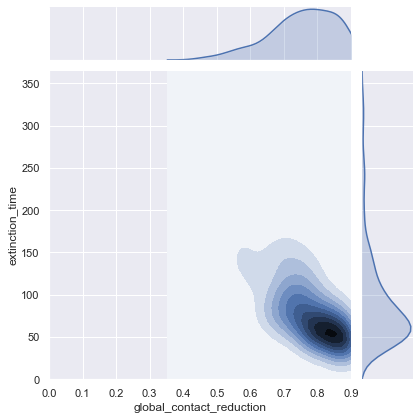

In [30]:
g = sns.jointplot(x="global_contact_reduction",
                  y="extinction_time",
                  kind="kde",
                  data = went_extinct_100,
                  ylim = (0,365),
                  xlim = (0, 0.9))

In [31]:
extinction_times_1 = pd.read_excel("../Data/Extinction Times/1_infection_every_scenario.xlsx")

In [32]:
went_extinct_1 = extinction_times_1.loc[
    (extinction_times_1["end_reason"] == "extinct") &
    (extinction_times_1["extinction_time"] != 15)]

Text(0, 0.5, 'Extinction Time (days)')

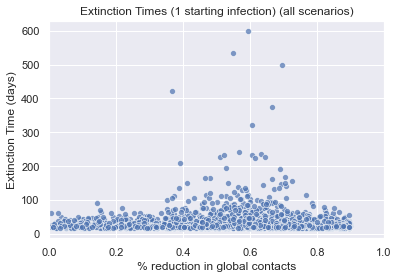

In [33]:
sns.scatterplot(x="global_contact_reduction",
                y="extinction_time",
                data = went_extinct_1,
                alpha = 0.7)
plt.xlim(0,1)
plt.title("Extinction Times (1 starting infection) (all scenarios)")
plt.xlabel("% reduction in global contacts")
plt.ylabel("Extinction Time (days)")

In [34]:
dat = extinction_times_1

dat['end_state'] = dat['end_reason'] 
dat['end_state']
dat.loc[dat.extinction_time == 15, ['end_state']] = 'extinct15'

dat.end_state.value_counts()

# make it a categorical type
dat.end_state= dat.end_state.astype(pd.api.types.CategoricalDtype(categories=['extinct', 'extinct15', 'more_than_X', 'timed_out']))
dat.end_state.value_counts()



#reason_tab = pd.crosstab(index=dat["end_state"],     
#                      columns="count")
#print(reason_tab)
#print(dat.end_reason)

extinct        1960
more_than_X    1771
extinct15      1268
timed_out         1
Name: end_state, dtype: int64

In [35]:
# Make a variable to use on the x axis that can be shared by bars 
# and points (NOTE still can't get plotting on top of each other to work)
# But this makes global contact reduction a discrete variable for which 
# there can be stacked bars

dat['global_contact_reduction_rnd'] = np.around(dat.global_contact_reduction, decimals=2)

tab = pd.crosstab(index=dat['global_contact_reduction_rnd'],     
                      columns="count")

print(tab)

col_0                         count
global_contact_reduction_rnd       
0.00                             29
0.01                             54
0.02                             52
0.03                             47
0.04                             68
...                             ...
0.86                             41
0.87                             44
0.88                             64
0.89                             52
0.90                             32

[91 rows x 1 columns]


In [36]:
dat.groupby('end_state').size()

end_state
extinct        1960
extinct15      1268
more_than_X    1771
timed_out         1
dtype: int64

In [37]:
dat['global_contact_reduction_rnd'] 

0       0.63
1       0.30
2       0.13
3       0.11
4       0.63
        ... 
4995    0.74
4996    0.38
4997    0.83
4998    0.15
4999    0.38
Name: global_contact_reduction_rnd, Length: 5000, dtype: float64

In [38]:
dat.sort_values(by=['global_contact_reduction_rnd'], inplace=True)

dat

,Unnamed: 0,hazard_rate_scale,infection_reporting_prob,contact_tracing_success_prob,contact_trace_delay_par,global_contact_reduction,two_step_tracing,prob_has_trace_app,backwards_trace,end_reason,...,722,723,724,725,726,727,728,729,end_state,global_contact_reduction_rnd
4754,4754,0.222421,0.2,0.807620,2.346853,0.000509,True,0.049113,False,more_than_X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,more_than_X,0.0
4091,4091,0.222421,0.2,0.701309,2.383996,0.001698,False,0.021790,True,more_than_X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,more_than_X,0.0
1180,1180,0.215233,0.1,0.835367,2.106212,0.003571,True,0.140052,True,extinct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,extinct15,0.0
729,729,0.215233,0.1,0.890000,2.257167,0.001279,False,0.242246,True,more_than_X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,more_than_X,0.0
593,593,0.222421,0.2,0.847514,2.159675,0.004301,True,0.223685,False,more_than_X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,more_than_X,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2109,2109,0.229609,0.3,0.772030,1.717019,0.896036,True,0.181141,False,extinct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,extinct,0.9
4973,4973,0.229609,0.3,0.886743,1.640776,0.899049,False,0.286044,False,extinct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,extinct15,0.9
3819,3819,0.236797,0.4,0.710917,2.428093,0.897233,False,0.480729,False,extinct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,extinct15,0.9
3927,3927,0.243986,0.5,0.930912,1.849567,0.895566,False,0.037958,False,extinct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,extinct15,0.9


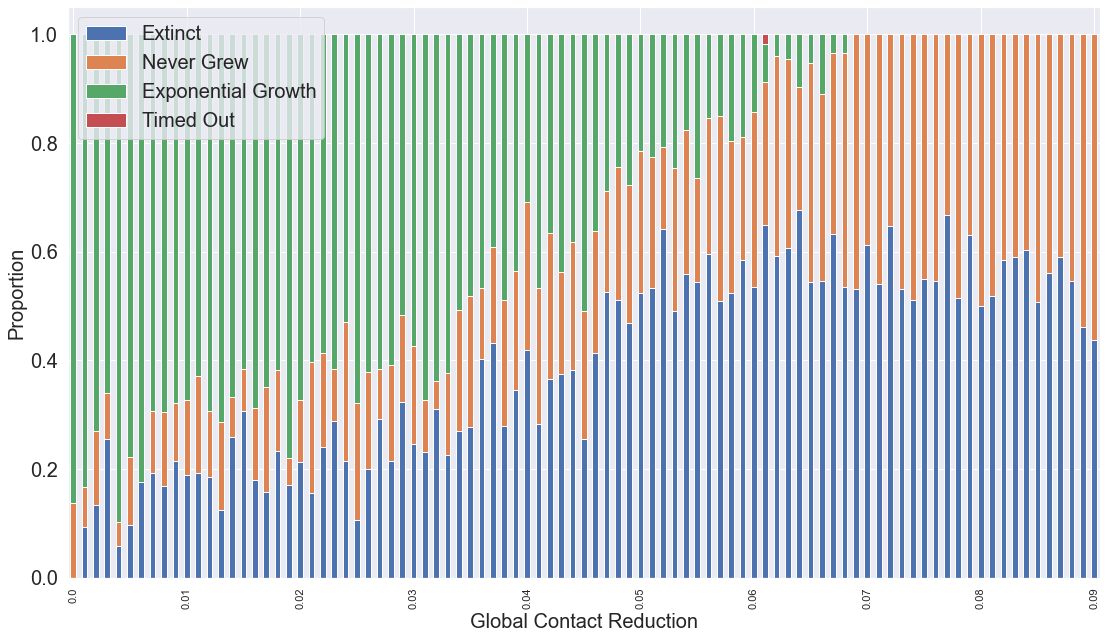

In [39]:
# Get proportion of epidemics that went extinct for each percentage reduction 
# global contacts

gcrs = np.unique(dat.global_contact_reduction_rnd)

index = pd.Index(gcrs, name='reduction')

extinct_val = []
extinct15_val = []
expo_val = []
timeout_val = []
ext = []


for gcr in gcrs: 
    subset = dat.loc[dat.global_contact_reduction_rnd == gcr]
    val_tot = len(subset.end_state)
    
    val0_freq = subset.groupby('end_state').size()['extinct']
    val0_per = val0_freq/val_tot
    extinct_val.append(val0_per)
    
    val1_freq = subset.groupby('end_state').size()['extinct15']
    val1_per = val1_freq/val_tot
    extinct15_val.append(val1_per)
    
    val2_freq = subset.groupby('end_state').size()['more_than_X']
    val2_per = val2_freq/val_tot
    expo_val.append(val2_per)
    
    val3_freq = subset.groupby('end_state').size()['timed_out']
    val3_per = val3_freq/val_tot
    timeout_val.append(val3_per)
    
    
data = {
    'Extinct': extinct_val,
    'Never Grew': extinct15_val,
    'Exponential Growth': expo_val,
    'Timed Out': timeout_val
}

df = pd.DataFrame(data, index=index)

ax = df.plot(kind='bar', stacked=True, figsize=(18.5, 10.5))
ax.set_ylabel('Proportion', fontsize = 20)

ax.set_xlabel('Global Contact Reduction', fontsize = 20)

plt.yticks(fontsize = 20)
plt.xticks(np.arange(0, 99, 10))
plt.legend(fontsize = 20)

plt.savefig('Prop_end_state_contact_reductions_1inf.png')
plt.show()

